# Scientific Python
Python can be used to read, handle and visualize data in a quick and readable way.

Python is used across fields like physics, biology, chemistry and social sciences.

Packages with built in functions from statistics are used to estimate uncertainties of measured results.

## A possible Workflow
In this lesson we will learn how to read data from an ordinary text file. The data has been taken from a lab experiment in a physics/electronics university course.

The goal is to estimate properties of the circuit and examine its behaviours.
The given circuit is used to generate damped and driven oscillations.
Important properties of the circuit are:
<ol>
    <li> The capacity of the capacitator
    <li> The inductance of the coil
    <li> The resistance of the resistor


The experiment is conducted and the values of the circuits parameters are written into a textfile called "data/03/circuit_parameters.txt".

The uncertainties on the circuit parameters are important for a correct interpretation of the results.

Read out the circuit parameters and save them into variables.


In [24]:
### Your Code here
import numpy as np
L, L_err, C, C_err, R_1, R_1_err, R_2, R_2_err = np.loadtxt('data/03/circuit_parameters.txt', unpack=True)

The first task is to determine the time dependence of the amplitude of a dampened oscillation. 
For that the times and voltages are read out.
The results are given in "data/03/data_a.txt".

Read out the data and shift the data t.min() to the left and U=43 down to calibrate the data for further analysis. 

In [25]:
### Your Code here
t, U = np.loadtxt('data/03/data_a.txt', unpack=True)

t -= t.min()
U -= 43

Plot the data using the matplotlib library

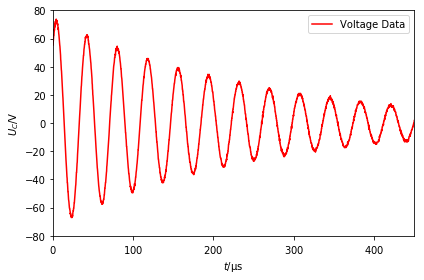

In [26]:
import matplotlib.pyplot as plt
plt.plot(t, U, 'r-', label='Voltage Data')
plt.ylim(-80, 80)
plt.xlim(0, 0.000450)
plt.xlabel(r'$t / \mathrm{\mu s}$')
plt.ylabel(r'$U_C / \mathrm{V}$')
plt.xticks([0.0000, 0.0001, 0.0002, 0.0003, 0.0004],
           [r"$0$", r"$100$", r"$200$", r"$300$", r"$400$"])
plt.legend(loc = "best")
plt.tight_layout()

To find the maxima and minima using the peakdetect function in the external package "peakdetect_function"

Store the minima and maxima in variables for further analysis.


In [27]:
### Your Code here
import peakdetect_function
maxima, minima = peakdetect_function.peakdetect(U, t, lookahead=100, delta=0)
maxima = np.array(maxima).T
minima = np.array(minima).T
t_ext = []
t_ext.extend(maxima[0,:])
t_ext.extend(minima[0,:])
U_ext = []
U_ext.extend(maxima[1,:])
U_ext.extend(-minima[1,:])

To evaluate the characteristics of the circuit from the measurements the convex hull of the minima and maxima has to be fitted to the data. This can be done via a linear regression of the form ln(U(t))=mt+b .

Define the linear function and do a linear fit using scipy.optimize

In [28]:
### Your Code here
from scipy.optimize import curve_fit

def f(x, m, b):
    return m*x + b

params_oE, cov_oE = curve_fit(f, maxima[0,:], np.log(abs(maxima[1,:])))
params_uE, cov_uE = curve_fit(f, minima[0,:], np.log(abs(minima[1,:])))
params, cov = curve_fit(f, t_ext, np.log(U_ext)) 

R_eff     = -2*params[0]*L 
R_eff_err = np.sqrt((-2*L*np.sqrt(cov[0][0]))**2+(-2*params[0]*L_err)**2)
T_x       = -1/params[0]
T_x_err   = np.sqrt((1/params[0]**2*np.sqrt(cov[0][0]))**2) 

Plot the results of the linear regression

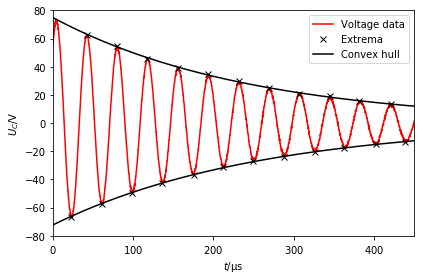

In [29]:
plt.plot(t, U, 'r-', label='Voltage data')
plt.plot(maxima[0], maxima[1], 'kx', label='Extrema')
plt.plot(minima[0], minima[1], 'kx')
plt.plot(x,  np.exp(params_oE[0]*x+params_oE[1]), 'k-', label='Convex hull')
plt.plot(x, -np.exp(params_uE[0]*x+params_uE[1]), 'k-')
plt.ylim(-80, 80)
plt.xlim(0, 0.000450)
plt.xlabel(r'$t / \mathrm{\mu s}$')
plt.ylabel(r'$U_C / \mathrm{V}$')
plt.xticks([0.0000, 0.0001, 0.0002, 0.0003, 0.0004],
           [r"$0$", r"$100$", r"$200$", r"$300$", r"$400$"])
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

Calculate the effective resistance and uncertainty on the parameters of the circuit using gaussian error propagation:

R_eff= -2 m L

Print the results of the analysis for further use.



In [30]:
print('voltage maxima:')
print('t[s]\t\tU_C[V]')
for i in range(0, len(maxima[0,:])):
    print('{:.6f}\t{:.2f}'.format(maxima[0,i], maxima[1,i]))
print('voltage minima:')
print('t[s]\t\tU_C[V]')
for i in range(0, len(minima[0,:])):
    print('{:.6f}\t{:.2f}'.format(minima[0,i], minima[1,i]))
print('the linear regression gives the function:')
print('------------------------------------------------------------')
print('| ln(U_C(t)) = ({:.3f}+-{:.3f})1/s * t + ({:.3f}+-{:.3f}) |'.format(params[0], np.sqrt(cov[0][0]), params[1], np.sqrt(cov[1][1])))
print('------------------------------------------------------------')
print('measured dampening resistance R_eff:\t({:.2f}+-{:.2f}) Ohm'.format(R_eff, R_eff_err))
print('used resistance R_1:\t\t({}+-{}) Ohm'.format(R_1, R_1_err))
print('relative deviation:\t\t\t{:.2f} %'.format(abs(R_1-R_eff)/R_1*100))

voltage maxima:
t[s]		U_C[V]
0.000042	62.60
0.000080	54.60
0.000117	45.80
0.000155	39.40
0.000193	34.60
0.000232	29.80
0.000269	25.00
0.000306	21.00
0.000346	19.40
0.000381	15.40
0.000421	13.80
0.000457	11.40
voltage minima:
t[s]		U_C[V]
0.000023	-67.00
0.000061	-57.40
0.000098	-49.40
0.000136	-42.20
0.000175	-36.60
0.000212	-31.00
0.000250	-27.00
0.000288	-23.80
0.000327	-20.60
0.000363	-17.40
0.000402	-15.00
0.000438	-13.40
the linear regression gives the function:
------------------------------------------------------------
| ln(U_C(t)) = (-3978.365+-36.562)1/s * t + (4.298+-0.010) |
------------------------------------------------------------
measured dampening resistance R_eff:	(133.51+-1.42) Ohm
used resistance R_1:		(134.4+-0.2) Ohm
relative deviation:			0.66 %
